# Задание 4
Реализовать и использовать явную схему метода Эйлера решения задачи Коши для системы ОДУ. Для линейной системы оценить длину шага, при которой метод устойчив.

## Теория

Явный метод Эйлера заключается в следующем. У нас есть производная функции $y'(t)=f(t,y(t))$ и есть начальное условие $y_0=y(t_0)$. Нам хотелось бы как-то приблизить нашу функцию. Метод Эйлера предлагает использовать следующую аппроксимацию:
$$y_{n+1}=y_n+hf(t_n,y_n),$$
где $y_{n+1}, y_n$ новое и старое значения нашей функции соответсвенно, $h$ -- шаг интегрирования, $f(t_n,y_n)$ -- первая производная. "Явность" метода заключается в том, что $y_{n+1}$ мы находим через $y_i,~i < n+1$

Для систем всё аналогично, если у нас есть набор уранвнений $y_i'(t)=f_i(t,y_1(t),\cdots,y_k)$, то формула записывается в виде:
$$y_{i,n+1}=y_{i,n}+hf_i(t_n,y_1,\cdots,y_k)$$

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Реализуем метод

In [2]:
def euler_method_system(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        y[i+1] = y[i] + np.array(f(y[i], t[i]))*(t[i+1]-t[i])
    return y

Возьмем для примера систему:
$$\begin{matrix}
\frac{dy_1}{dt} = y_1-4y_2, & \frac{dy_2}{dt} = y_1+y_2
\end{matrix}$$
с начальными условиями $y_1(0) = 2,~y_2(0) = 3$ на интервале $[0,2]$

In [3]:
# Определение функции
def f(y, t):
    return [y[0] - 4*y[1], y[0] + y[1]]

# Начальное значение
y0 = [2, 3]

# Массив времени
t = np.linspace(0, 2, 40)

# Решение с помощью метода Эйлера
y = euler_method_system(f, y0, t)

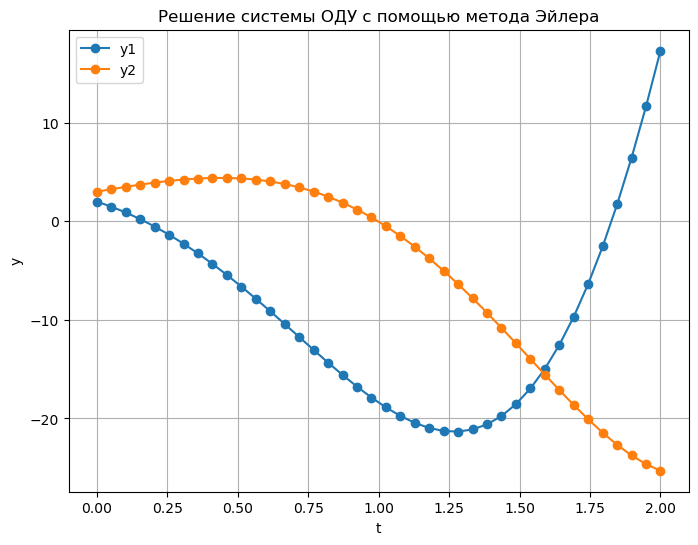

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(t, y[:, 0], label='y1', marker='o')
ax.plot(t, y[:, 1], label='y2', marker='o')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Решение системы ОДУ с помощью метода Эйлера')
ax.grid()
ax.legend()
plt.show()

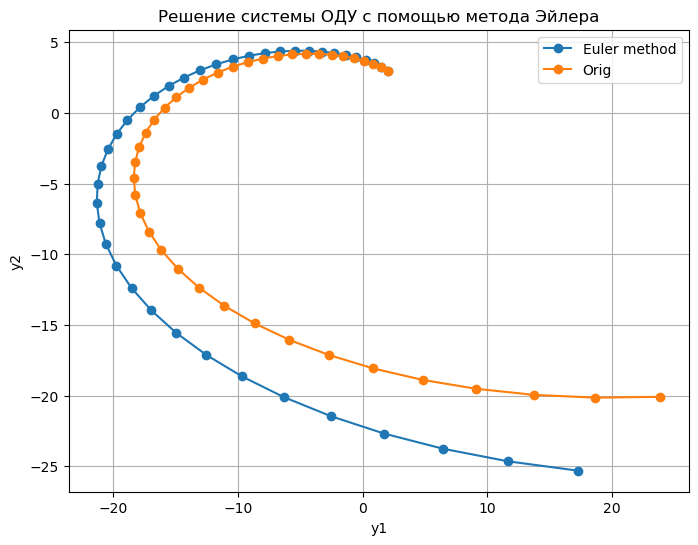

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(y[:,0], y[:,1], marker='o', label = 'Euler method')
ax.plot(-2*np.exp(t)+4*np.exp(t)*np.cos(t)**2-12*np.exp(t)*np.cos(t)*np.sin(t),
        -3*np.exp(t)+6*np.exp(t)*np.cos(t)**2+2*np.exp(t)*np.cos(t)*np.sin(t),
        marker='o', label = 'Orig')
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_title('Решение системы ОДУ с помощью метода Эйлера')
ax.grid()
ax.legend()
plt.show()

## Устойчивость

Численный метод интегрирования ОДУ называется устойчивым (при заданном шаге $h$ и для определенного $\lambda$), если численное интегрирование уравнения
$$y'(t)=\lambda y(t)$$
остается ограниченным при $t\to\infty$ (источник лежит в папке вместе с заданием)

Для метода Эйлера:
$$y_{n+1}=y_n+hf(t_n,y_n)=y_n+hy'(t_n),$$
$$y'(t_n) = \frac{y_{n-1}-y_n}{h}.$$
Подставим в уравнение выше и получим:
$$\frac{y_{n-1}-y_n}{h}=\lambda y_n,$$
$$y_{n+1} = (1+h\lambda)y_n,$$
т.е. метод является устойчивым, когда $|1+h\lambda|\leq 1$, или:
$$-2\leq h\lambda \leq 0$$

Попробуем поварьировать шаги в системе выше

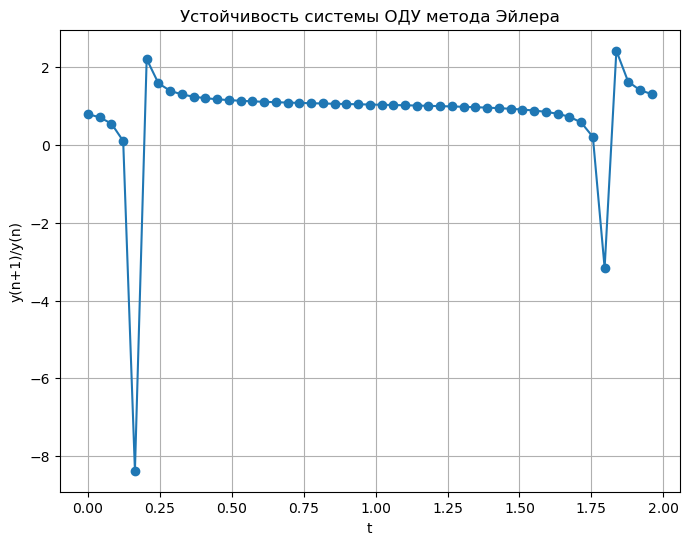

In [6]:
# Определение функции
def f(y, t):
    return [y[0] - 4*y[1], y[0] + y[1]]

# Начальное значение
y0 = [2, 3]

# Варьируем шаг
# for num_points in range(3,1000):
#     t = np.linspace(0,2,num_points)
#     y = euler_method_system(f, y0, t)
#     h = t[1]-t[0]

t = np.linspace(0,2,50)
y = euler_method_system(f, y0, t)
h = t[1]-t[0]

fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(t[:-1], y[:,0][1:]/y[:,0][:-1], marker='o')
ax.set_xlabel('t')
ax.set_ylabel('y(n+1)/y(n)')
ax.set_title('Устойчивость системы ОДУ метода Эйлера')
ax.grid()
plt.show()